# Linear Regression with Gradient Descent and Brute Force

This notebook demonstrates how to load a real dataset, visualize it, and fit a linear model using both a brute-force approach and gradient descent.

Ce notebook met en œuvre trois approches pour ajuster un modèle de régression linéaire à des données simulées :

une recherche par force brute,

une descente de gradient manuelle,

et une régression utilisant l’algorithme SGDRegressor de scikit-learn.

L'objectif est de comparer ces méthodes à la fois en termes de précision (MSE) et de temps d'exécution.
La méthode par force brute donne des résultats précis mais coûteux en temps.
La descente de gradient, bien paramétrée, atteint des performances proches beaucoup plus rapidement.
Enfin, SGDRegressor offre une solution rapide, fiable et prête à l’emploi pour des cas réels à grande échelle.

## Load the Data

In [ ]:
pip install matplotlib

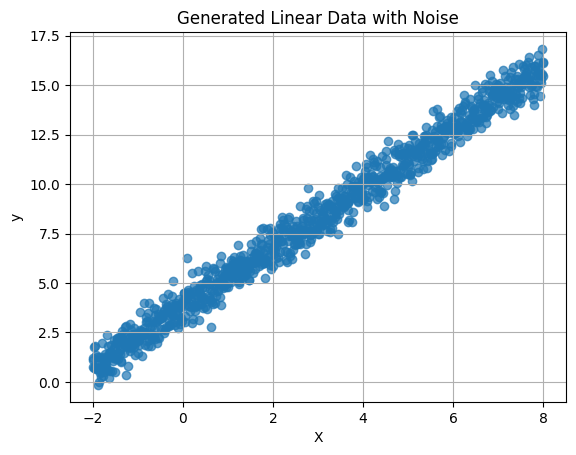

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Charger les données (assurez-vous que le fichier est dans le même dossier)
data = np.loadtxt("linear_regression_data.txt", skiprows=1)
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

# Affichage des données
plt.scatter(X, y, alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Linear Data with Noise")
plt.grid(True)
plt.show()


### Helper: Plot Line Given Theta

In [13]:
def plot_line(theta_1, theta_0):
    plt.scatter(X, y, alpha=0.5)
    x_vals = np.array([X.min(), X.max()])
    y_vals = theta_1 * x_vals + theta_0
    plt.plot(x_vals, y_vals, 'r-', label=f"y = {theta_1:.2f}x + {theta_0:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Model Fit")
    plt.legend()
    plt.grid(True)
    plt.show()

## Brute Force Grid Search for Best Theta

[Brute Force] Temps : 1.45 s
[Brute Force] Theta optimal : (np.float64(1.507537688442211), np.float64(3.7939698492462313)), MSE : 0.3444


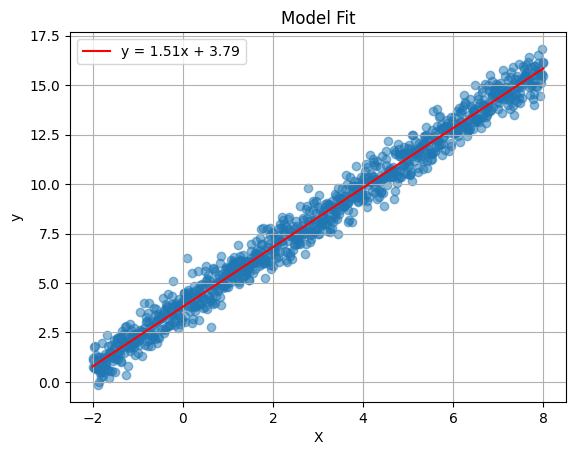

In [25]:
theta_1_vals = np.linspace(1, 2, 200)
theta_0_vals = np.linspace(3, 5, 200)

best_loss = float('inf')
best_theta = (0, 0)
start_time = time.time()

for theta_1 in theta_1_vals:
    for theta_0 in theta_0_vals:
        y_pred = theta_1 * X + theta_0
        loss = np.mean((y - y_pred) ** 2)
        if loss < best_loss:
            best_loss = loss
            best_theta = (theta_1, theta_0)

end_time = time.time()
print(f"[Brute Force] Temps : {end_time - start_time:.2f} s")
print(f"[Brute Force] Theta optimal : {best_theta}, MSE : {best_loss:.4f}")
plot_line(*best_theta)


## Gradient Descent Implementation

[Gradient Descent] Temps : 0.04 s
[Gradient Descent] Theta : slope = 1.51, intercept = 3.79


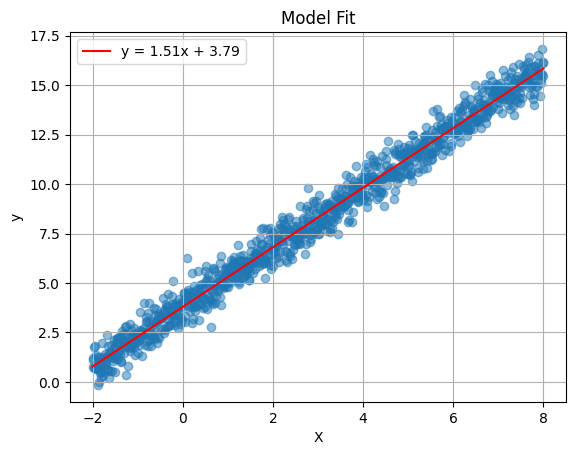

In [26]:
# Préparer les données avec biais x0 = 1
X_b = np.c_[np.ones((len(X), 1)), X]
theta = np.random.randn(2, 1)  # initialisation aléatoire
eta = 0.05
n_iterations = 1000
m = len(X_b)

start_time = time.time()
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
end_time = time.time()

print(f"[Gradient Descent] Temps : {end_time - start_time:.2f} s")
print(f"[Gradient Descent] Theta : slope = {theta[1,0]:.2f}, intercept = {theta[0,0]:.2f}")
plot_line(theta[1, 0], theta[0, 0])


## Scikit-learn SGDRegressor

[SGDRegressor - sklearn] Temps : 0.0404 s
[SGDRegressor - sklearn] Theta : slope = 1.42, intercept = 3.79


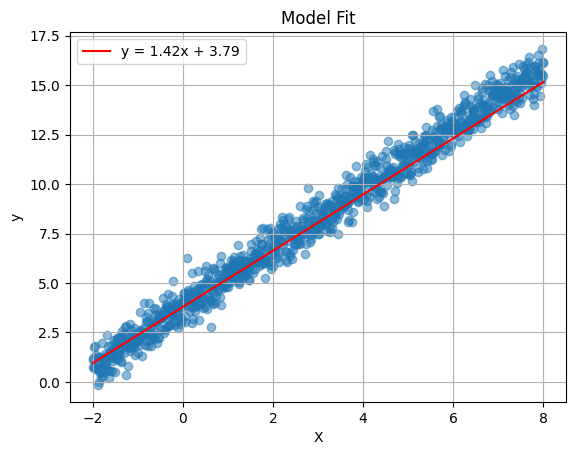

In [27]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
start_time = time.time()
sgd_reg.fit(X, y.ravel())
end_time = time.time()

print(f"[SGDRegressor - sklearn] Temps : {end_time - start_time:.4f} s")
print(f"[SGDRegressor - sklearn] Theta : slope = {sgd_reg.coef_[0]:.2f}, intercept = {sgd_reg.intercept_[0]:.2f}")
plot_line(sgd_reg.coef_[0], sgd_reg.intercept_[0])


## conclusion

Trois méthodes ont été comparées :

Force brute : précise mais très lente (1.45 s).

Descente de gradient : rapide et efficace (0.04 s), bon compromis.

SGDRegressor : aussi rapide et fiable, idéal pour une utilisation professionnelle.

Conclusion : la force brute est utile à des fins pédagogiques, mais la descente de gradient et SGDRegressor sont préférables en pratique.